In [61]:
# Packages
# in CMD - pip install seaborn
#        - pip install ttkthemes
#        - pip install pyqt5
# in Jupyter Notebook - !pip install ttkthemes

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
import os
import warnings
warnings.filterwarnings(action='ignore')
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from distutils.util import strtobool
from ttkthemes import ThemedTk
from PyQt5 import QtWidgets
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import pathlib
from pandastable import Table, TableModel

In [62]:
# GUI

#curr_options = ["SINGLEPULSE", "PULSEDDYNAMIC", "PULSED"]
#curr_amps = ["A", "mA"]
#ordr = [1,2,3,4,5,6,7,8,9]
t_f = ['False', 'True']
#incs = [1,2,5,10]

def browse_button():
    # Allow user to select a directory and store it in global var
    # called folder_path
    global folder_path
    filename = filedialog.askdirectory()
    folder_path.set(filename)

root = ThemedTk(theme='adapta')
root.title("GUI")

# General Inputs
Label(root, text = "General Inputs", font=("Arial Bold", 12)).grid(row = 0, sticky = W)

Label(root, text = "Directory").grid(row = 1, sticky = W)
#Label(root, text = "Filenames").grid(row = 2, sticky = W)
Label(root, text = "Filetype").grid(row = 3, sticky = W)

# Output Info
Label(root, text = "Output Folder Location (If default - create gm_output_ov folder inside directory)").grid(row = 10, sticky = W)
# Overwrite or no
Label(root, text = "Allow Overwriting Output Files?").grid(row = 11, sticky = W)

# Graph Options
#Label(root, text = "Graph Options", font=("Arial Bold", 12)).grid(row = 12, sticky = W)

# What order
#Label(root, text = "Order (Ex: 1=Linear)").grid(row = 16, sticky = W)
# Show points or no
#Label(root, text = "Show Points?").grid(row = 17, sticky = W)
# Export or no as excel worksheet
Label(root, text = "Export as Excel Worksheet?").grid(row = 18, sticky = W)

# Directory
folder_path = StringVar()
e0 = ttk.Entry(master=root,textvariable=folder_path)
#e0.insert(0, '')
dir_button = ttk.Button(text="Browse", command=browse_button)
# Filename(s)
#e1 = ttk.Entry(root)
#e1.insert(0, "30MILL-SANAM")
# Filetype
e2 = ttk.Entry(root)
e2.insert(0, ".xlsx")

# Output directory
e9 = ttk.Entry(root)
e9.insert(0, 'gm_output_ov')
# Dropdown menu
e10 = StringVar(root)
e10.set(t_f[0])
e10x = OptionMenu(root,e10,*t_f)

# Dropdown menu
#g5 = StringVar(root)
#g5.set(ordr[2])
#g5x = OptionMenu(root,g5,*ordr)

# Dropdown menu
#g6 = StringVar(root)
#g6.set(t_f[0])
#g6x = OptionMenu(root,g6,*t_f)

# Dropdown menu
g7 = StringVar(root)
g7.set(t_f[0])
g7x = OptionMenu(root,g7,*t_f)

e0.grid(row = 1, column = 1)
dir_button.grid(row=1, column=2)
#e1.grid(row = 2, column = 1)
e2.grid(row = 3, column = 1)
e9.grid(row = 10, column = 1)
e10x.grid(row = 11, column = 1)

#g5x.grid(row = 16, column = 1)
#g6x.grid(row = 17, column = 1)
g7x.grid(row = 18, column = 1)

def getInput():

    a = e0.get()
    #b = e1.get()
    c = e2.get()
    j = e9.get()
    k = e10.get()
    #q = int(g5.get())
    #r = g6.get()
    s = g7.get()
    
    root.destroy()

    global overall
    overall = [a,c,j,k,s]

root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
    
ttk.Button(root, text = "Submit",
           command = getInput).grid(sticky = E, row = 50)
mainloop()

In [63]:
# Kill script if GUI has empty spots

import ctypes  # An included library with Python install.
def Mbox(title, text, style):
    return ctypes.windll.user32.MessageBoxW(0, text, title, style)

if '' in overall:
    Mbox('Error!', 'At least one entry in the GUI is empty - please fix', 0)
    sys.exit() # Kill script

In [64]:
# Input info
directory = pathlib.Path(overall[0])  # Provide the location of the excel files * Please use forward slashes
#name = overall[1]  #*RA* Provide the model a.k.a. everything before the temperature (prob change here)
file_type = overall[1]  # If reading in multiple files - they all have to be the same file type

# Output info
output_f = overall[2]  # <- This is where the folder where you would like to put all the images of the graphs
                     # NOTE: Put the desired location of where the folder is located here
                     # If the file is in the same location as your directory, all you need to do is put the folder name here
                     # * NO backward slashes only forward
# Allow Overwriting or no? - Default=False
over = bool(strtobool(overall[3]))

In [6]:
# Select the columns you want from the excel spreadsheet

select_cols = ['Filename', 'Number', 'Phi / °', 'Theta / °', 'Integration Time / ms', 'Source current - Currentsource / mA', 'Current - Currentsource / mA',
               'Voltage - Currentsource / V', 'Radiometric / W/m²', 'Photometric / lx', 'x - Color Coordinates',
              'y - Color Coordinates', 'u - Color Coordinates', 'v1976 - Color Coordinates', 'Peak Wavelength / nm', 
              'Centroid Wavelength / nm', 'Dominant Wavelength / nm', 'CRI', 'CRI09 - CRI'] 
               #'Partial luminous flux / lm', 'Partial radiant power / W'

# Add columns here for any calculations
# Calculated columns will be appended to the dataframe
#column_d = ['Voltage  - Currentsource / V', 'x - Color Coordinates', 'y - Color Coordinates', 'Peak Wavelength / nm', 
        #    'Dominant Wavelength / nm', 'Centroid Wavelength / nm'] # Change (-) columns
#column_p = ['Radiometric / W', 'Photometric / lm'] # Relative (%) columns

# Here: rename all selected columns & calculated columns - don't forget calculated columns are added towards the end
# Change columns first then relative columns

#column_rn = ['Serial Number', 'Δ Forward Voltage (Vf)', 'Δ CIEx', 'Δ CIEy', 'Δ Peak Wavelength (λp)', 'Δ Centroid Wavelength (λcen)', 
#             'Δ Dominant Wavelength (λd)', 'Δ CCT / K', 'Δ CRI', 'Δ R 9', 'Δ FWHM', 'Relative Radiant Power', 'Relative Luminous Flux', 'Tj (°C)', 'lf (A)' ]


# 'Last Dark Current (min)', 'Signal Level (counts)', 'Signal Level (%)', 'Scotopic Luminous Flux', 'UVA (W)', 'UVB (W)', 
# 'UVC (W)', 'VIS (W)', 'TRIx', 'TRIy', 'TRIz', 'CIEz', 'CIEu', 'v1960', 'v1976', 'Width (nm)', 'CRI', 'Red Effect (%)', 
# 'Vis Effect (%)', 'CCT',

In [7]:
# IMPORTANT - OUTPUT
# Select columns here - this is what outputs the graphs
# Add more columns & titles here if necessary

# Renamed name of temperature and current column

y1 = 'x - Color Coordinates'
y2 = 'y - Color Coordinates'
y3 = 'u - Color Coordinates'
y4 = 'v1976 - Color Coordinates'
y5 = 'Peak Wavelength / nm'
y6 = 'Centroid Wavelength / nm'
y7 = 'Dominant Wavelength / nm'
y8 = 'CRI'
y9 = 'CRI09 - CRI'

# Show all of y variables (number of columns that we would like outputs for), only change if removing or adding columns
y_n = [y1,y2,y3,y4,y5,y6,y7,y8,y9]

row_size = 5 # Make sure row and column size can accomodate all the subplots
column_size = 2
ax_n = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1), (4,0)] # the axes for the subplots

# Graph order number - 1 = linear, 2 = quadratic, 3 = cubic, etc.
#ord_num = overall[4]

# Show points or no?
#show_pt = bool(strtobool(overall[5]))

# Export as Excel Worksheet or no?
exp = bool(strtobool(overall[4]))

In [8]:
# Change directory
os.chdir(directory)
pathlib.Path.cwd()

WindowsPath('C:/Users/Chelton Kuang/Documents/gm_input_ov')

In [9]:
# Check whether the specified path exists or not
isExist = os.path.exists(output_f)

if not isExist:
  
  # Create output dir if doesn't exist
  os.makedirs(output_f)
  Mbox("Create output dir", "The output directory has been created: " + output_f, 0)

In [10]:
# Identifies all filenames in the directory

filesnames = os.listdir()
filesnames = [f for f in filesnames if f.lower().endswith(file_type)]

# Read in excel files as dataframe

# Here we concat similarly named files together - nice for putting together different test datasets on the same chips

#df = pd.concat(map(pd.read_excel, filesnames)) # Change to read_csv for csv files

df = pd.DataFrame()

for file in filesnames:
    df_temp = pd.read_excel(file)
    df_temp['Filename'] = file
    df = df.append(df_temp)

df['Filename'] = df['Filename'].str.rsplit('-', 1).str.get(0) # Get rid of last - character for easy calculations later
df = df[ ['Filename'] + [ col for col in df.columns if col != 'Filename' ] ]
df

,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Signal Level / Counts,Signal Level / %,Interface type,Trigger Delay / ms,Source current - Currentsource / mA,...,Partial luminous flux / lm,Partial radiant power / W,Date,Time,Name,Averages,Filter,Measurement Setup,Analysis Range,CCT / K
0,20MILL-PW-XBT3535,1.0,0.0,-90.0,20.0,309.0,0.0,CAS 120/140CT/140D - USB,0.0,150.0,...,-0.000002,-6.489000e-09,2021-08-12,11:19:38,C:\Documents and Settings\Administrator\Deskto...,NaN,NaN,NaN,NaN,NaN
1,20MILL-PW-XBT3535,2.0,0.0,-85.0,20.0,309.0,0.0,CAS 120/140CT/140D - USB,0.0,150.0,...,-0.000024,-4.368000e-07,2021-08-12,11:19:46,C:\Documents and Settings\Administrator\Deskto...,NaN,NaN,NaN,NaN,NaN
2,20MILL-PW-XBT3535,3.0,0.0,-80.0,20.0,309.0,0.0,CAS 120/140CT/140D - USB,0.0,150.0,...,-0.000020,6.536000e-09,2021-08-12,11:19:55,C:\Documents and Settings\Administrator\Deskto...,NaN,NaN,NaN,NaN,NaN
3,20MILL-PW-XBT3535,4.0,0.0,-75.0,20.0,310.0,0.0,CAS 120/140CT/140D - USB,0.0,150.0,...,-0.000016,-5.026000e-07,2021-08-12,11:20:04,C:\Documents and Settings\Administrator\Deskto...,NaN,NaN,NaN,NaN,NaN
4,20MILL-PW-XBT3535,5.0,0.0,-70.0,20.0,312.0,0.0,CAS 120/140CT/140D - USB,0.0,150.0,...,-0.000011,2.587000e-07,2021-08-12,11:20:28,C:\Documents and Settings\Administrator\Deskto...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,XBT-3535-MINI,144.0,135.0,-70.0,20.0,2792.0,4.0,CAS 120/140CT/140D - USB,0.0,500.0,...,0.000007,2.517000e-04,2021-08-13,15:10:16,C:\Documents and Settings\Administrator\Deskto...,NaN,NaN,NaN,NaN,NaN
144,XBT-3535-MINI,145.0,135.0,-75.0,20.0,1253.0,2.0,CAS 120/140CT/140D - USB,0.0,500.0,...,-0.000001,1.000000e-04,2021-08-13,15:10:18,C:\Documents and Settings\Administrator\Deskto...,NaN,NaN,NaN,NaN,NaN
145,XBT-3535-MINI,146.0,135.0,-80.0,20.0,469.0,0.0,CAS 120/140CT/140D - USB,0.0,500.0,...,-0.000021,1.674000e-05,2021-08-13,15:10:20,C:\Documents and Settings\Administrator\Deskto...,NaN,NaN,NaN,NaN,NaN
146,XBT-3535-MINI,147.0,135.0,-85.0,20.0,342.0,0.0,CAS 120/140CT/140D - USB,0.0,500.0,...,-0.000014,3.322000e-06,2021-08-13,15:10:21,C:\Documents and Settings\Administrator\Deskto...,NaN,NaN,NaN,NaN,NaN


In [11]:
# Double check if imported worksheets are not empty - if empty, script is killed

if df.empty:
    Mbox('Error!', 'Imported worksheets are empty', 0)
    sys.exit() # Kill script

In [12]:
# Double check if expected columns are not missing

try:
    df = df[select_cols]
except KeyError as e:
    Mbox('Error!', repr(e) + '\n Fix then Restart & Run All', 0)
    sys.exit() # Kill script

In [13]:
# Select columns needed - ADD OR REMOVE AS NEEDED

df = df.fillna(0)

#df = df[df[cols_puls] == pulse_width]
#df = df.drop([cols_puls], axis=1)
#df = df.dropna()
#df

In [14]:
# Check for any zeros
'''
xdl = []
xd = df[(df.iloc[:,3:] == 0).any(axis=1)]
for i in xd['Number'].unique():
    xdl.append(i)

if xdl:
    Mbox('Warning!', 'Please double-check these numbers / rows - ' + str(xdl) + '\n The rows will be dropped.', 0)
    ''';

In [15]:
# Drop any rows that have 0s
'''
indices = df.loc[(df.iloc[:,3:] == 0).any(axis=1), :].index.tolist()
for ind in indices:
    df = df.drop(ind)
''';

In [16]:
# If Voltage above 200v, point out row and drop

df_200v = df[df['Voltage - Currentsource / V'] >= 200]
df = df[df['Voltage - Currentsource / V'] < 200]
if not df_200v.empty:
    class TestApp(Frame):
        """Basic test frame for the table"""
        def __init__(self, parent=None):
            self.parent = parent
            Frame.__init__(self)
            self.main = self.master
            self.main.geometry('600x400+200+100')
            self.main.title('Observations above 200v which will be dropped')
            f = Frame(self.main)
            f.pack(fill=BOTH,expand=1)
            self.table = pt = Table(f, dataframe=df_200v,
                                    showtoolbar=True, showstatusbar=True)
            pt.show()
            return

    app = TestApp()
    #launch the app
    app.mainloop()
    #Mbox('Warning!', 'At least one observation has voltage above 200v \n they will be dropped', 0)

In [17]:
# Function for version checking saved images for pngs

def version_png(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    plt.savefig('{}{:d}.png'.format(filename, i), bbox_inches='tight')

# Average of each part

In [18]:
dfs = df.groupby(['Filename', 'Phi / °', 'Theta / °']).max().reset_index()
#dfs = dfs.drop(['Filename'], axis=1)
new_cols = [col for col in dfs.columns if col != 'Filename'] + ['Filename']
dfs = dfs[new_cols]

In [19]:
# Calculations (one df for max normalization & another for theta = 0 normalization)

dfmax = dfs.groupby(['Phi / °', 'Filename']).max().reset_index()
new_cols = [col for col in dfmax.columns if col != 'Filename'] + ['Filename']
dfmax = dfmax[new_cols]
dftheta = dfs[dfs['Theta / °'] == 0]

# Columns besides radiometric & photometric are normalized to theta = 0
test = (dfs.set_index(['Phi / °','Filename']).iloc[:,8:17]-dftheta.set_index(['Phi / °','Filename']).iloc[:,8:17]).dropna(axis=0).reset_index()
test2 = (dfs.set_index(['Phi / °','Filename']).iloc[:,[6,7]] / dfmax.set_index(['Phi / °','Filename']).iloc[:,[6,7]]).dropna(axis=0).reset_index()
test2.iloc[:,1:] = test2.iloc[:,1:].mul(100)

# Max normalized for radio & photo, rest are theta normalized
dfmaxz = pd.concat([dfs.iloc[:,0:7], test2.iloc[:,2:], test.iloc[:,2:], dfs.iloc[:,-1]], axis=1)

# All theta normalized
test2 = (dfs.set_index(['Phi / °','Filename']).iloc[:,[6,7]] / dftheta.set_index(['Phi / °','Filename']).iloc[:,[6,7]]).dropna(axis=0).reset_index()
test2.iloc[:,1:] = test2.iloc[:,1:].mul(100)
dfthetaz = pd.concat([dfs.iloc[:,0:7], test2.iloc[:,2:], test.iloc[:,2:], dfs.iloc[:,-1]], axis=1)

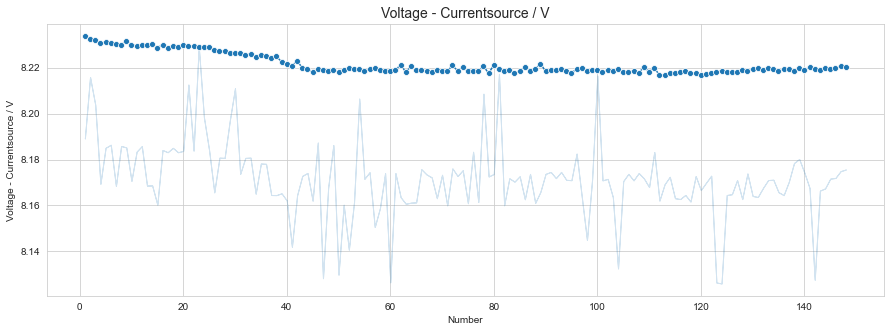

In [20]:
# Number vs Voltage
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,5

sns.set_style("whitegrid")
sns.lineplot(x='Number', y='Voltage - Currentsource / V', data=dfs, ci=False, marker = 'o')
plt.title('Voltage - Currentsource / V', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Voltage_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Voltage.png', bbox_inches='tight');

# Radiometric - By Phi

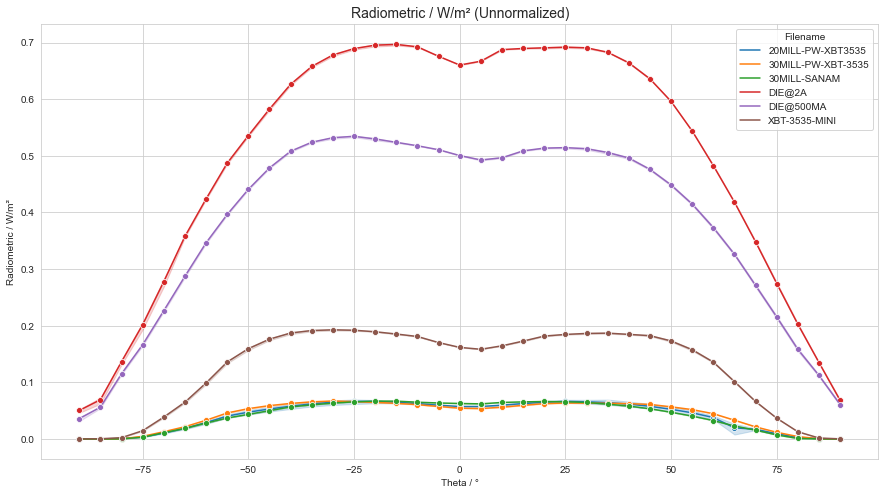

In [21]:
# Theta vs Radiometric by Phi (Unnormalized)

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Filename', data=dfs, marker='o')
plt.title('Radiometric / W/m² (Unnormalized)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Unnorm_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Unnorm.png', bbox_inches='tight');

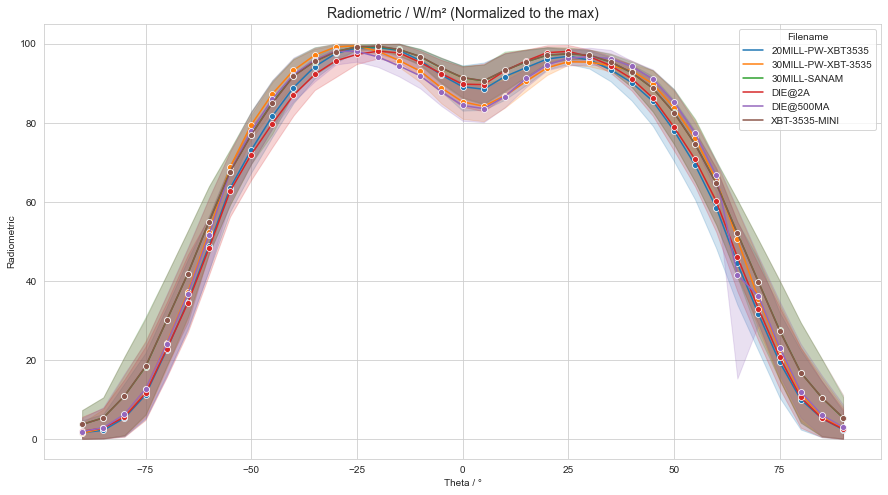

In [22]:
# Theta vs Radiometric by Phi (Normalized to the max)

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Filename', data=dfmaxz, marker='o')
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to the max)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Max_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Max.png', bbox_inches='tight');

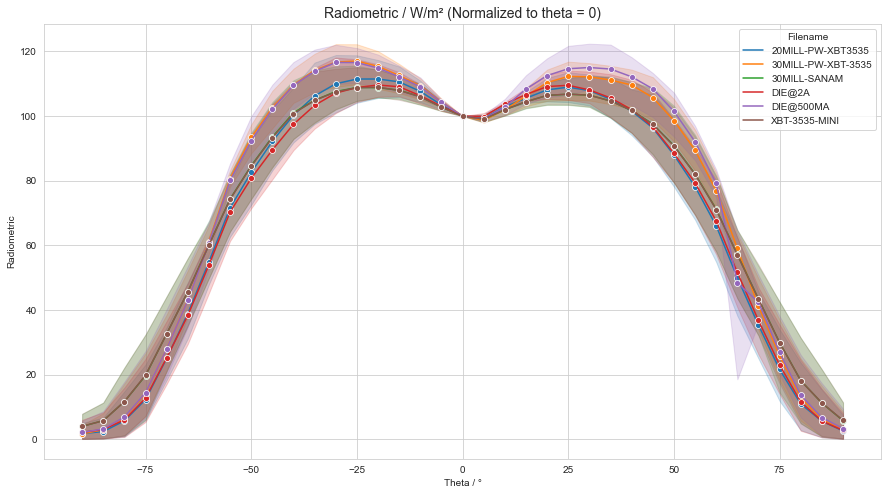

In [23]:
# Theta vs Radiometric by Phi (Normalized to theta = 0)

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Filename', data=dfthetaz, marker='o')
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to theta = 0)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Theta0_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Theta0.png', bbox_inches='tight');

# Radiometric - Theta Absolute Values

In [24]:
dfs['Theta_Abs'] = dfs['Theta / °'].abs()
dfmaxz['Theta_Abs'] = dfmaxz['Theta / °'].abs()
dfthetaz['Theta_Abs'] = dfthetaz['Theta / °'].abs()

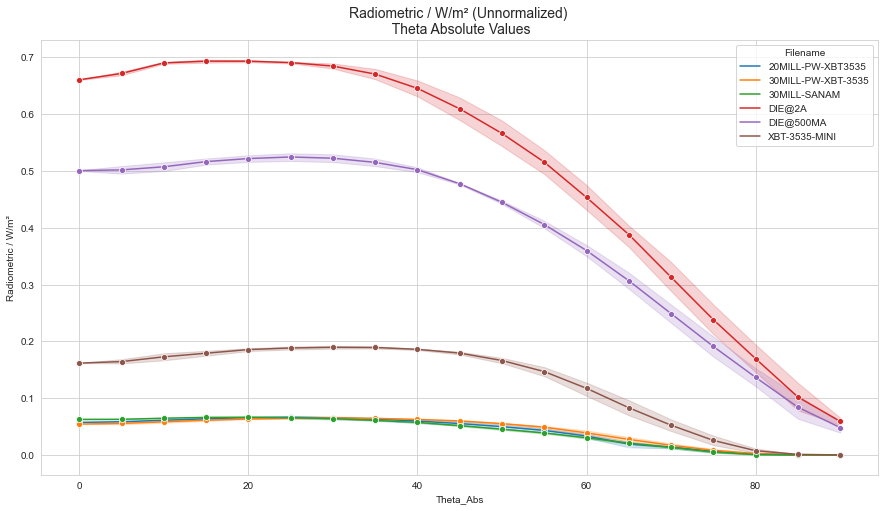

In [25]:
# Theta vs Radiometric by Phi (Unnormalized) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Filename', data=dfs, marker='o')
plt.title('Radiometric / W/m² (Unnormalized) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Unnorm_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Unnorm_Abs.png', bbox_inches='tight');

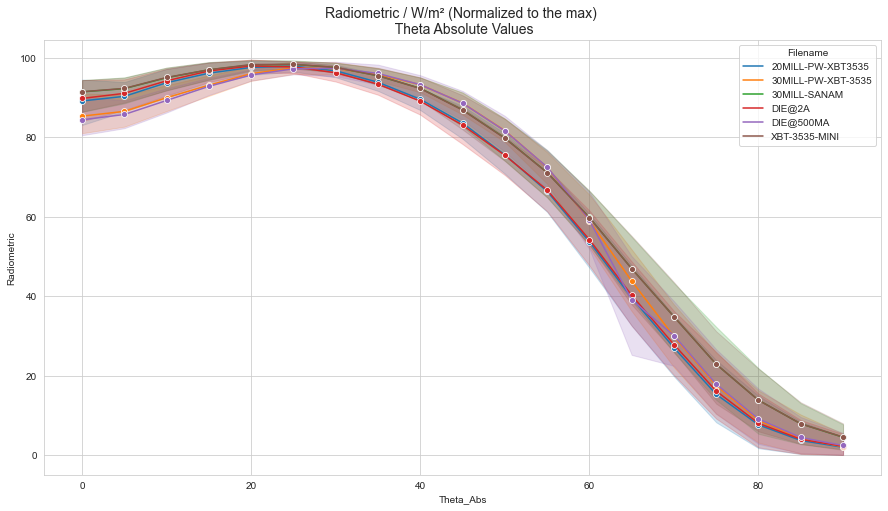

In [26]:
# Theta vs Radiometric by Phi (Normalized to the max) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Filename', data=dfmaxz, marker='o')
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to the max) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Max_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Max_Abs.png', bbox_inches='tight');

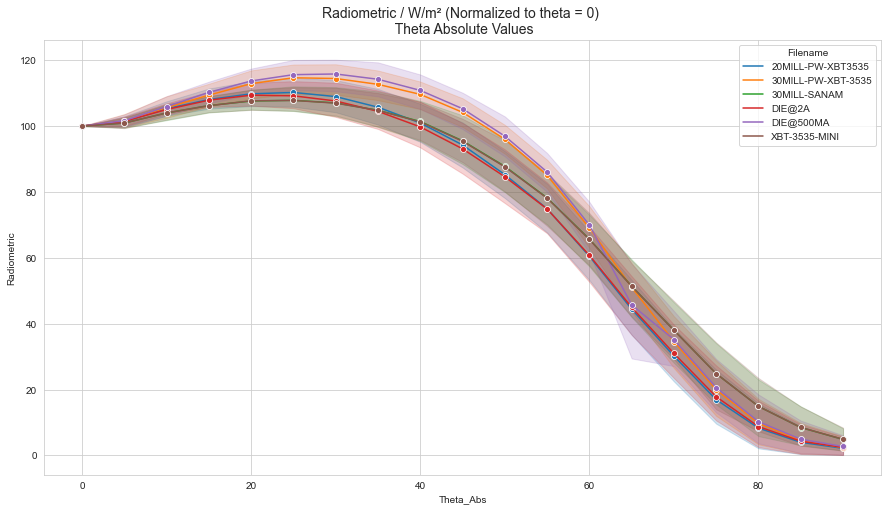

In [27]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Filename', data=dfthetaz, marker='o')
plt.ylabel("Radiometric")
plt.title('Radiometric / W/m² (Normalized to theta = 0) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Theta0_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Theta0_Abs.png', bbox_inches='tight');

# Photometric - By Phi

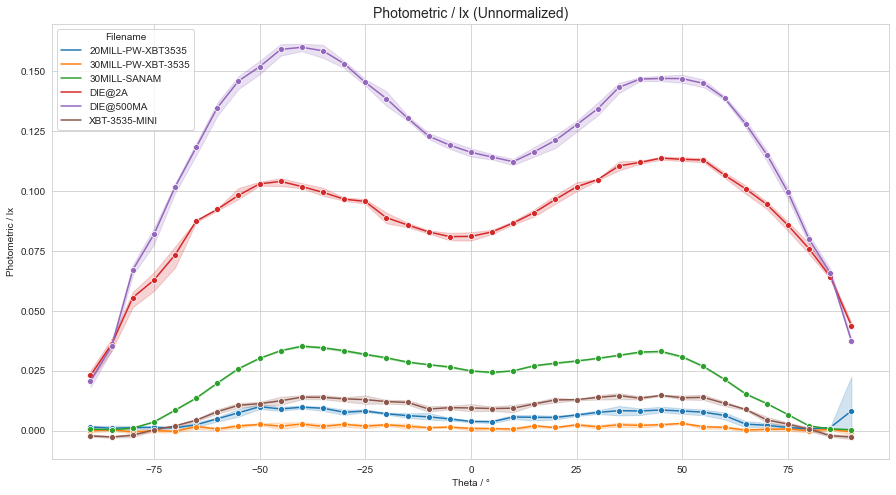

In [28]:
# Theta vs Photometric by Phi (Unnormalized)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Filename', data=dfs, marker='o')
plt.title('Photometric / lx (Unnormalized)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Unnorm_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Unnorm.png', bbox_inches='tight');

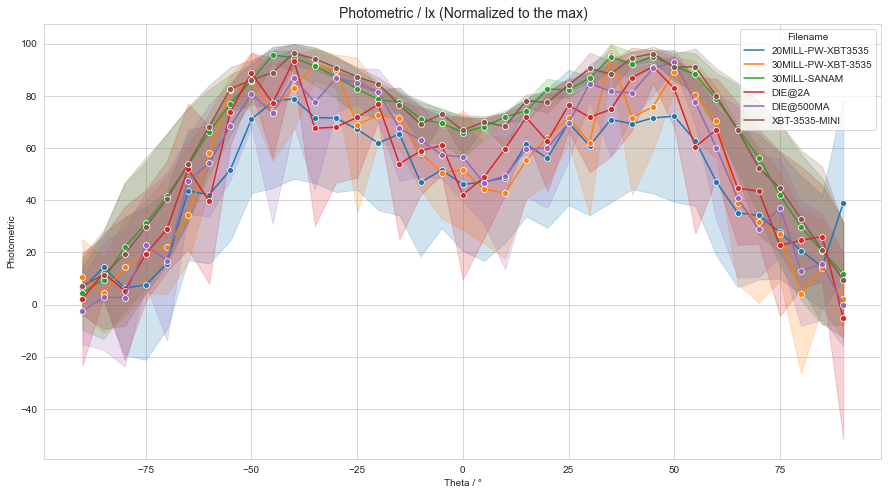

In [29]:
# Theta vs Photometric by Phi (Normalized to the max)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Filename', data=dfmaxz, marker='o')
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to the max)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Max_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Max.png', bbox_inches='tight');

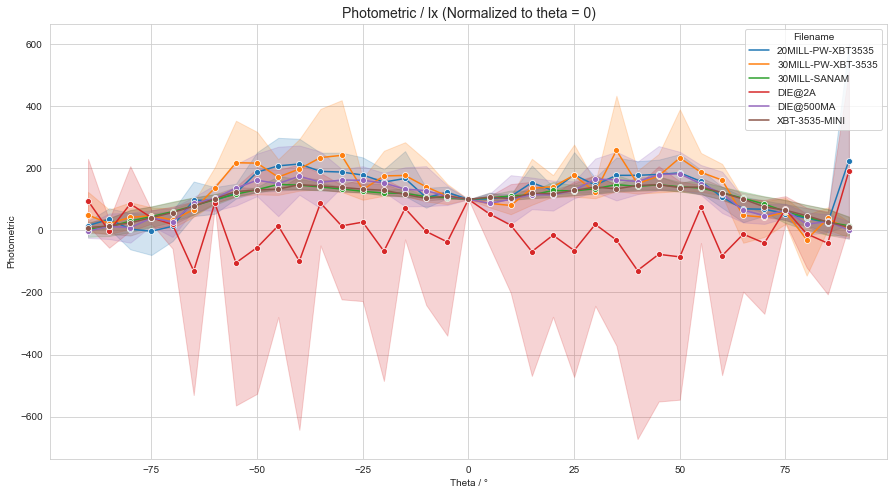

In [30]:
# Theta vs Photometric by Phi (Normalized to theta = 0)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Filename', data=dfthetaz, marker='o')
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to theta = 0)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Theta0_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Theta0.png', bbox_inches='tight');

# Photometric - Theta Absolute Values

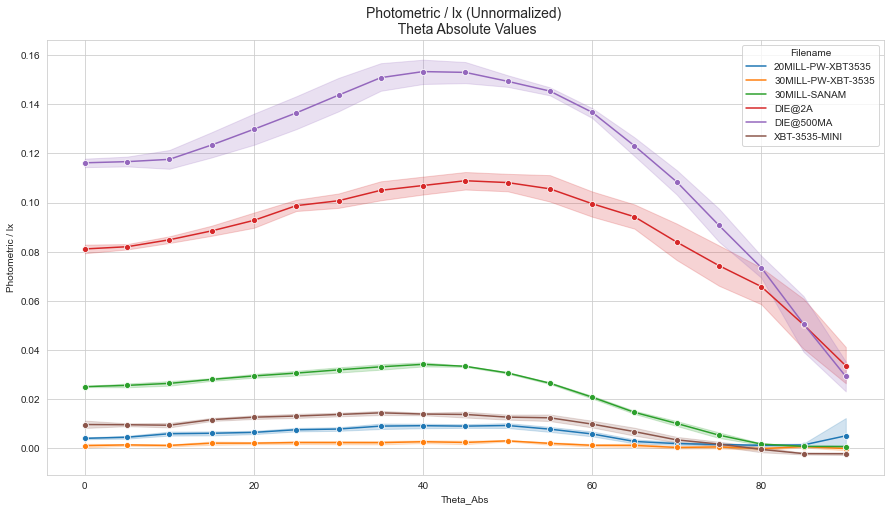

In [31]:
# Theta vs Radiometric by Phi (Unnormalized) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Filename', data=dfs, marker='o')
plt.title('Photometric / lx (Unnormalized) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Unnorm_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Unnorm_Abs.png', bbox_inches='tight');

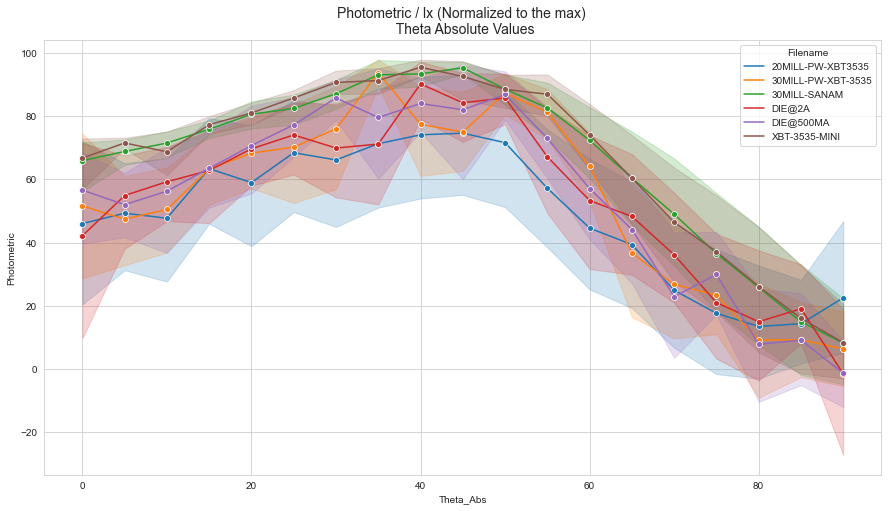

In [32]:
# Theta vs Radiometric by Phi (Normalized to the max) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Filename', data=dfmaxz, marker='o')
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to the max) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Max_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Max_Abs.png', bbox_inches='tight');

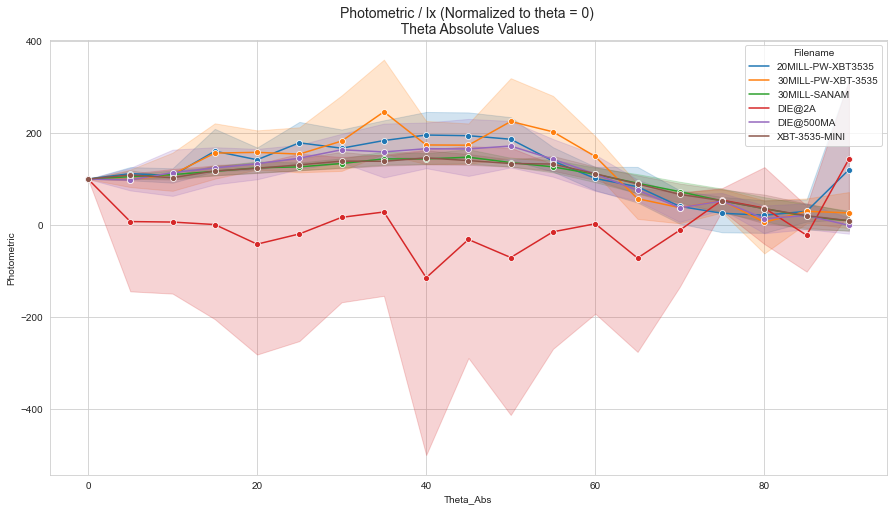

In [33]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Filename', data=dfthetaz, marker='o')
plt.ylabel("Photometric")
plt.title('Photometric / lx (Normalized to theta = 0) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Theta0_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Theta0_Abs.png', bbox_inches='tight');

# Polar Coordinates Plot

In [54]:
# Function for version checking saved images for pngs

def version_png_p(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    fig.savefig('{}{:d}.png'.format(filename, i))

In [34]:
# For Polar Plot - Select either Radiometric or Photometric in pop-up box

sel_list = ['Radiometric / W/m²', 'Photometric / lx']

root = ThemedTk(theme='arc')
root.title("GUI for Polar Plot")

Label(root, text = "Select Radiometric or Photometric").grid(row = 1, sticky = W)

e7 = StringVar(root)
e7.set(sel_list[0])
drop = ttk.OptionMenu(root,e7,*sel_list)

drop.grid(row = 2)
    
def kill():
    global h
    h = e7.get()
    root.destroy()
    
ttk.Button(root, text = "Submit",
        command = kill).grid(row = 50)

root.mainloop()

sel = h # or Photometric

In [50]:
# Groupby theta and take means - able to draw a nice curve

dfmaxz_mean = dfmaxz.groupby('Theta_Abs').mean().reset_index()
dfmaxz_mean[sel] = dfmaxz_mean[sel]/100

In [51]:
import math  # Change degrees to radians for plotting
def deg_to_rad(dr):
    return (dr*math.pi)/180
theta = deg_to_rad(dfmaxz_mean['Theta_Abs'])
theta_abs = dfmaxz_mean['Theta_Abs']
r = dfmaxz_mean[sel]

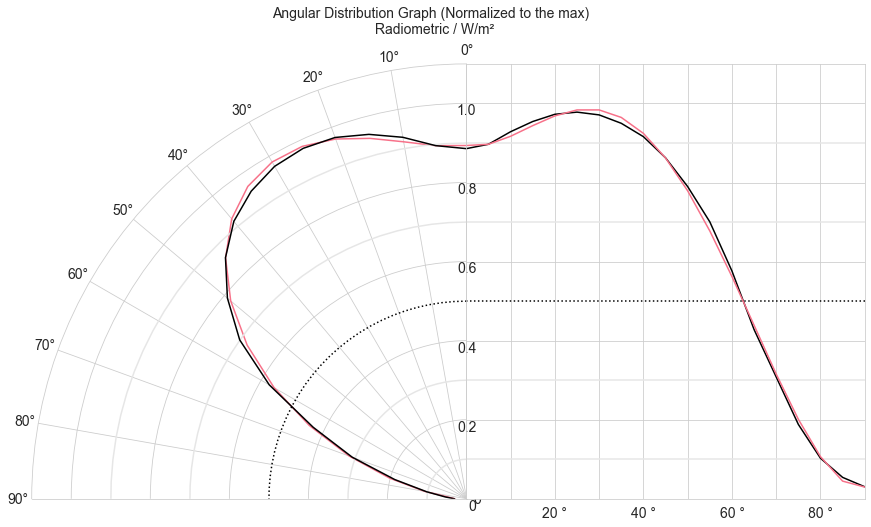

In [55]:
# Polar plot - Normalized to the max

from matplotlib import gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

fig = plt.figure()
fig.suptitle('Angular Distribution Graph (Normalized to the max) \n ' + sel, fontsize = 14)
gs = gridspec.GridSpec(1,2, width_ratios=[1,0.9]) 
ax0 = fig.add_subplot(gs[0], polar=True)
ax0.set_theta_zero_location("N") # Places 0 degrees to the North
ax0.plot(theta, r, c='black', zorder=111)
ax0.set_rlabel_position(90) # BUG: currently does not work with set_thetamin and thetamax - it should change labels to 90 deg
p = np.polyfit(theta, r, 4) # 4th order fit
yfit = np.polyval(p, theta)

# The fit plot
ax0.plot(theta, yfit, '-')
ax0.set_rlim(0,1.1)

# Radial = 0.5 plot
ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*0.5, color='black', linestyle='dotted')

# Add additional radial lines
lin = [0.1,0.3,0.7,0.9]
for i in lin:
    ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*i, color='0.9', linestyle='-')

ax0.set_thetamax(90) # Create a quarter polar graph

ax0.set_yticklabels([]) # Hide y-tick labels

# shared axis Y
ax1 = plt.subplot(gs[1], sharey = ax0)
ax1.tick_params(axis="y",direction="in", pad=-10)
ax1.plot(theta_abs, r, c='black')

# Only show tick labels multiple of 20
ax1.set_xticks([0,10,20,30,40,50,60,70,80,90])
xticks = ax1.xaxis.get_major_ticks()
xt = [0,1,3,5,7,9]
for x in xt:
    xticks[x].label1.set_visible(False)

ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0])

p = np.polyfit(theta_abs, r, 4)
yfit = np.polyval(p, theta_abs)

# The fit plot
ax1.plot(theta_abs, yfit, '-')

# Radial = 0.5 plot
ax1.hlines(y=0.5, xmin = 0, xmax = 90, color='black', linestyle='dotted')

# Add additional radial lines
for i in lin:
    ax1.hlines(y=i, xmin = 0, xmax = 90, color='0.9', linestyle='-')
    
#frequency = 2
#plt.xticks(dfthetaz_mean['Theta_Deg'][::frequency])

ax1.margins(x=0)

# Show tick labels below ticks
for tick in ax1.yaxis.get_majorticklabels():
    tick.set_verticalalignment("top")
    
# Add degree symbol to x-axis
ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
    
# Shift plots as close as possible
plt.setp(ax0.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=-0.01, hspace=0)
plt.show()
if over == False:
    fname = output_f + '/Overlap_Polar_Max_' + sel[:5] + '_'
    version_png_p(fname)
else:
    fig.savefig(output_f + '/Overlap_Polar_Max_' + sel[:5] + '.png');

In [53]:
# Groupby theta and take means - able to draw a nice curve

dfthetaz_mean = dfthetaz.groupby('Theta_Abs').mean().reset_index()
dfthetaz_mean[sel] = dfthetaz_mean[sel]/100

In [40]:
import math  # Change degrees to radians for plotting
def deg_to_rad(dr):
    return (dr*math.pi)/180
theta = deg_to_rad(dfthetaz_mean['Theta_Abs'])
theta_abs = dfthetaz_mean['Theta_Abs']
r = dfthetaz_mean[sel]

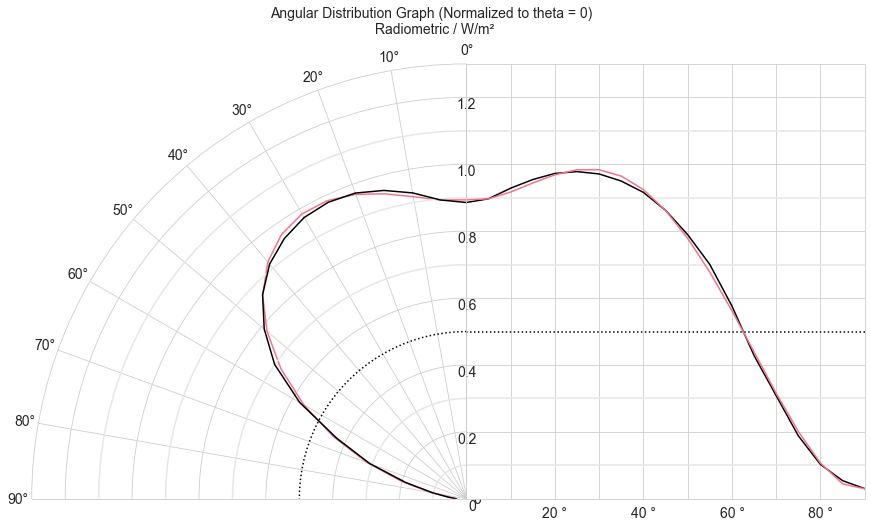

In [56]:
# Polar plot - Normalized to theta = 0

from matplotlib import gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

fig = plt.figure()
fig.suptitle('Angular Distribution Graph (Normalized to theta = 0) \n ' + sel, fontsize = 14)
gs = gridspec.GridSpec(1,2, width_ratios=[1,0.9]) 
ax0 = fig.add_subplot(gs[0], polar=True)
ax0.set_theta_zero_location("N") # Places 0 degrees to the North
ax0.plot(theta, r, c='black', zorder=111)
ax0.set_rlabel_position(90) # BUG: currently does not work with set_thetamin and thetamax - it should change labels to 90 deg
p = np.polyfit(theta, r, 4) # 4th order fit
yfit = np.polyval(p, theta)

# The fit plot
ax0.plot(theta, yfit, '-')
ax0.set_rlim(0,1.3)

# Radial = 0.5 plot
ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*0.5, color='black', linestyle='dotted')

# Add additional radial lines
lin = [0.1,0.3,0.7,0.9,1.1]
for i in lin:
    ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*i, color='0.9', linestyle='-')

ax0.set_thetamax(90) # Create a quarter polar graph

ax0.set_yticklabels([]) # Hide y-tick labels

# shared axis Y
ax1 = plt.subplot(gs[1], sharey = ax0)
ax1.tick_params(axis="y",direction="in", pad=-10)
ax1.plot(theta_abs, r, c='black')

# Only show tick labels multiple of 20
ax1.set_xticks([0,10,20,30,40,50,60,70,80,90])
xticks = ax1.xaxis.get_major_ticks()
xt = [0,1,3,5,7,9]
for x in xt:
    xticks[x].label1.set_visible(False)

ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1.0,1.2])

p = np.polyfit(theta_abs, r, 4)
yfit = np.polyval(p, theta_abs)

# The fit plot
ax1.plot(theta_abs, yfit, '-')

# Radial = 0.5 plot
ax1.hlines(y=0.5, xmin = 0, xmax = 90, color='black', linestyle='dotted')

# Add additional radial lines
for i in lin:
    ax1.hlines(y=i, xmin = 0, xmax = 90, color='0.9', linestyle='-')
    
#frequency = 2
#plt.xticks(dfthetaz_mean['Theta_Deg'][::frequency])

ax1.margins(x=0)

# Show tick labels below ticks
for tick in ax1.yaxis.get_majorticklabels():
    tick.set_verticalalignment("top")
    
# Add degree symbol to x-axis
ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))
    
# Shift plots as close as possible
plt.setp(ax0.get_yticklabels(), visible=False)
plt.subplots_adjust(wspace=-0.01, hspace=0)
plt.show()
if over == False:
    fname = output_f + '/Overlap_Polar_Theta0_' + sel[:5] + '_'
    version_png_p(fname)
else:
    fig.savefig(output_f + '/Overlap_Polar_Theta0_' + sel[:5] + '.png');

In [42]:
# Function for popup window
class ScrollableWindow(QtWidgets.QMainWindow):
    def __init__(self, fig):
        self.qapp = QtWidgets.QApplication([])

        QtWidgets.QMainWindow.__init__(self)
        title = 'GM Graphs'
        self.setWindowTitle(title)
        self.widget = QtWidgets.QWidget()
        self.setCentralWidget(self.widget)
        self.widget.setLayout(QtWidgets.QVBoxLayout())
        self.widget.layout().setContentsMargins(0,0,0,0)
        self.widget.layout().setSpacing(0)

        self.fig = fig
        self.canvas = FigureCanvas(self.fig)
        self.canvas.draw()
        self.scroll = QtWidgets.QScrollArea(self.widget)
        self.scroll.setWidget(self.canvas)

        self.nav = NavigationToolbar(self.canvas, self.widget)
        self.widget.layout().addWidget(self.nav)
        self.widget.layout().addWidget(self.scroll)

        self.show()
        self.qapp.exec_()

In [43]:
# Function for version checking saved images for pngs

def version_png_f(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    f.savefig('{}{:d}.png'.format(filename, i))

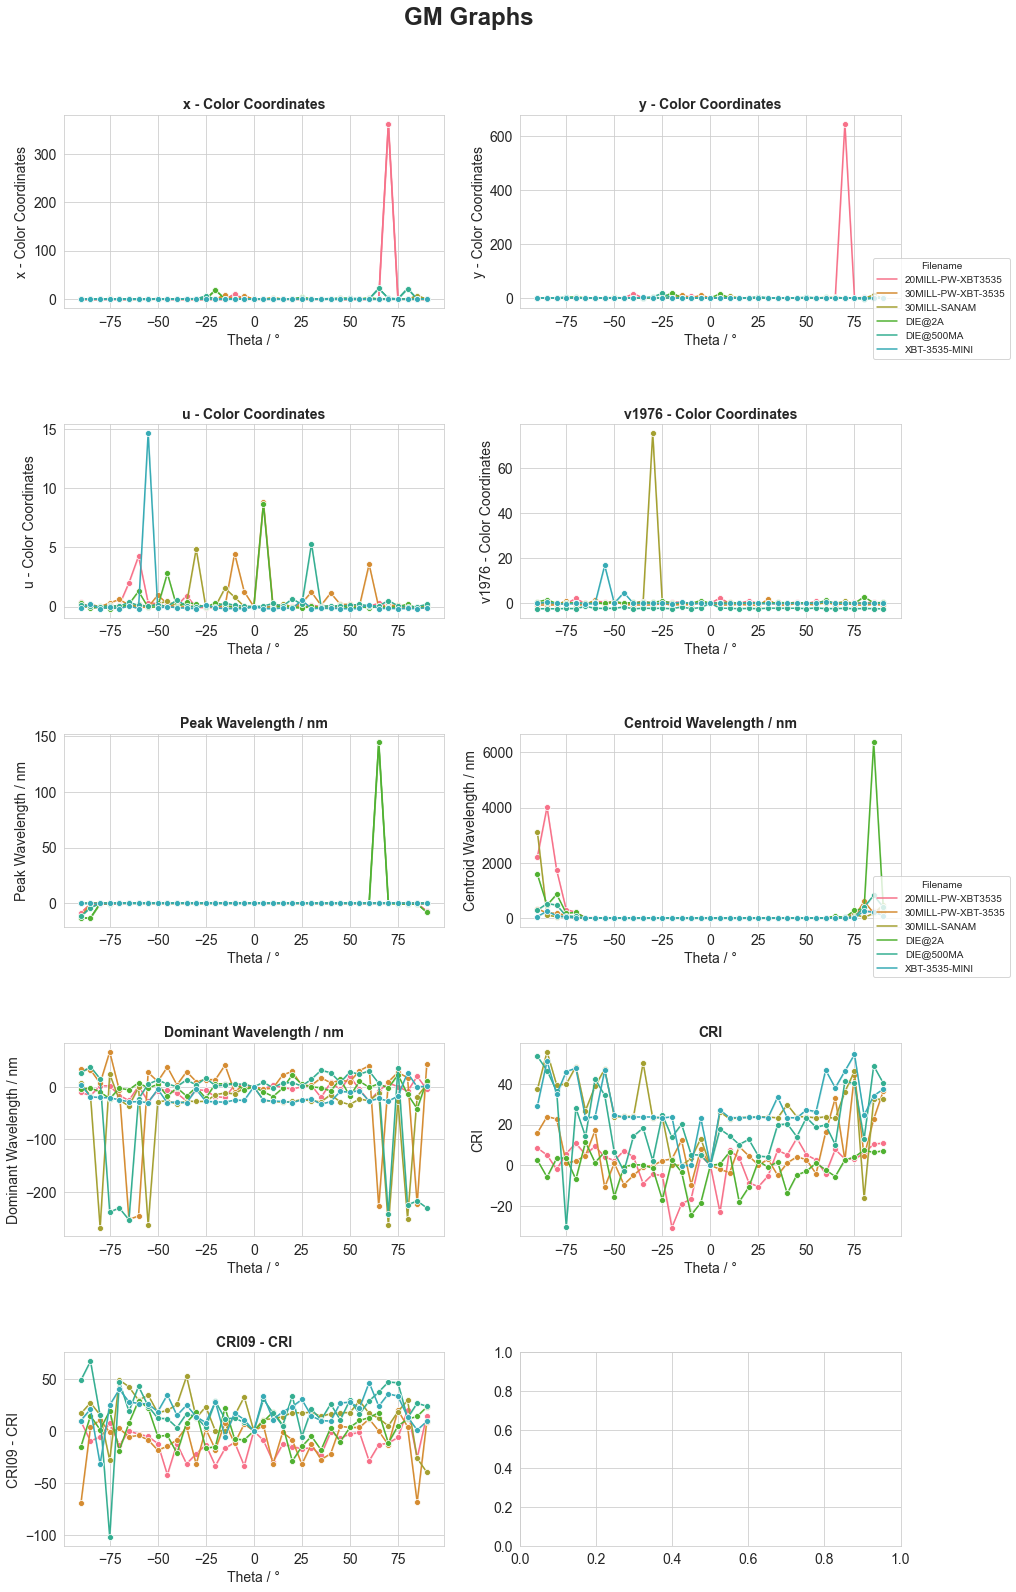

In [57]:
# Rest of the columns

# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})

plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,25))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('GM Graphs', fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b) in zip(y_n, ax_n):

    c = sns.lineplot(ax=axes[b], x='Theta / °', y=a, hue='Filename', data=dfthetaz, ci=False, legend=False, marker='o')

    axes[b].set_title(a, fontweight = 'bold', fontsize = 14)
 
 # Re-added c1 for legend
c1 = sns.lineplot(ax=axes[0,0], x='Theta / °', y=y1, hue='Filename', data=dfthetaz, ci=False, marker='o')

axes[0,0].set_title(y1, fontweight = 'bold', fontsize = 14)
c1.legend(loc='right', bbox_to_anchor=(2.5, 0), ncol=1).set_title('Filename') # , prop={'size': 6} <- increase legend size
c1.set_zorder(1)

c5 = sns.lineplot(ax=axes[2,0], x='Theta / °', y=y5, hue='Filename', data=dfthetaz, ci=False, marker='o')

axes[2,0].set_title(y5, fontweight = 'bold', fontsize = 14)
c5.legend(loc='right', bbox_to_anchor=(2.5, 0), ncol=1).set_title('Filename') # , prop={'size': 6} <- increase legend size
c5.set_zorder(1)

# pass the figure to the custom window
#a = ScrollableWindow(f);

In [59]:
if over == False:
    fname = output_f + '/Overlap_GM_Graphs_'
    version_png_f(fname)
else:
    f.savefig(output_f + '/Overlap_GM_Graphs.png')

In [46]:
# Export as Excel Worksheet if needed

fn = list(dfmaxz['Filename'].unique())

if exp == True:
    with pd.ExcelWriter(output_f + '/overlap_all_output_maxnorm.xlsx') as writer:
        for i in fn:
            dfmaxz[dfmaxz['Filename'] == i].to_excel(writer, sheet_name=i, index=False)
else:
    pass

In [47]:
# View outliers of all the parts

from scipy import stats

cols = list(df.select_dtypes(include=[np.number]).columns)
colsn = cols[4:]

for i in colsn:
    dfsn = df[(np.abs(stats.zscore(df[i])) > 3)]
    if dfsn.empty:
        pass
    else:
        print(i)
        display(dfsn)

Source current - Currentsource / mA


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
0,DIE@2A,1.0,0.0,-90.0,20.0,2000.0,2002.315,6.842767,0.04407,0.01998,0.24681,0.28712,0.16587,0.43417,276.55,279.11,484.52,89.9,36.0
1,DIE@2A,2.0,0.0,-85.0,20.0,2000.0,2001.186,6.839516,0.05866,0.03226,0.25497,0.29786,0.16817,0.44204,276.56,279.38,485.68,84.3,1.3
2,DIE@2A,3.0,0.0,-80.0,20.0,2000.0,1998.760,6.838373,0.12840,0.04952,0.25531,0.28494,0.17284,0.43402,276.57,279.36,483.26,91.7,43.7
3,DIE@2A,4.0,0.0,-75.0,20.0,2000.0,2000.084,6.831873,0.18870,0.05581,0.26152,0.28236,0.17835,0.43327,276.60,279.17,481.90,95.4,62.5
4,DIE@2A,5.0,0.0,-70.0,20.0,2000.0,1999.679,6.836044,0.26430,0.06530,0.25355,0.27637,0.17458,0.42816,276.62,279.18,481.84,93.6,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,DIE@2A,144.0,135.0,-70.0,20.0,2000.0,1999.825,6.804320,0.28270,0.07609,0.25556,0.28299,0.17371,0.43280,276.71,279.23,482.86,92.0,46.5
144,DIE@2A,145.0,135.0,-75.0,20.0,2000.0,2000.214,6.797765,0.20630,0.06578,0.26104,0.28208,0.17810,0.43302,276.67,279.32,481.92,94.8,59.6
145,DIE@2A,146.0,135.0,-80.0,20.0,2000.0,2001.623,6.801007,0.13920,0.05689,0.25738,0.28872,0.17303,0.43673,276.68,279.41,483.75,92.2,49.0
146,DIE@2A,147.0,135.0,-85.0,20.0,2000.0,2003.066,6.804865,0.07280,0.03886,0.26411,0.30059,0.17379,0.44504,276.62,279.61,485.39,90.5,34.6


Current - Currentsource / mA


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
0,DIE@2A,1.0,0.0,-90.0,20.0,2000.0,2002.315,6.842767,0.04407,0.01998,0.24681,0.28712,0.16587,0.43417,276.55,279.11,484.52,89.9,36.0
1,DIE@2A,2.0,0.0,-85.0,20.0,2000.0,2001.186,6.839516,0.05866,0.03226,0.25497,0.29786,0.16817,0.44204,276.56,279.38,485.68,84.3,1.3
2,DIE@2A,3.0,0.0,-80.0,20.0,2000.0,1998.760,6.838373,0.12840,0.04952,0.25531,0.28494,0.17284,0.43402,276.57,279.36,483.26,91.7,43.7
3,DIE@2A,4.0,0.0,-75.0,20.0,2000.0,2000.084,6.831873,0.18870,0.05581,0.26152,0.28236,0.17835,0.43327,276.60,279.17,481.90,95.4,62.5
4,DIE@2A,5.0,0.0,-70.0,20.0,2000.0,1999.679,6.836044,0.26430,0.06530,0.25355,0.27637,0.17458,0.42816,276.62,279.18,481.84,93.6,50.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,DIE@2A,144.0,135.0,-70.0,20.0,2000.0,1999.825,6.804320,0.28270,0.07609,0.25556,0.28299,0.17371,0.43280,276.71,279.23,482.86,92.0,46.5
144,DIE@2A,145.0,135.0,-75.0,20.0,2000.0,2000.214,6.797765,0.20630,0.06578,0.26104,0.28208,0.17810,0.43302,276.67,279.32,481.92,94.8,59.6
145,DIE@2A,146.0,135.0,-80.0,20.0,2000.0,2001.623,6.801007,0.13920,0.05689,0.25738,0.28872,0.17303,0.43673,276.68,279.41,483.75,92.2,49.0
146,DIE@2A,147.0,135.0,-85.0,20.0,2000.0,2003.066,6.804865,0.07280,0.03886,0.26411,0.30059,0.17379,0.44504,276.62,279.61,485.39,90.5,34.6


Voltage - Currentsource / V


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
0,DIE@500MA,1.0,0.0,-90.0,20.0,500.0,501.4675,19.20147,0.02716,0.01674,0.22523,0.26405,0.15756,0.41560,273.90,276.73,482.96,0.0,0.0
1,DIE@500MA,2.0,0.0,-85.0,20.0,500.0,500.2143,19.20198,0.05346,0.03229,0.23763,0.25750,0.16929,0.41275,273.92,277.02,480.59,0.0,0.0
2,DIE@500MA,3.0,0.0,-80.0,20.0,500.0,500.4277,19.20252,0.11290,0.06447,0.23868,0.26624,0.16698,0.41909,273.94,276.87,481.92,88.9,33.7
3,DIE@500MA,4.0,0.0,-75.0,20.0,500.0,500.3709,19.20005,0.16370,0.07554,0.23720,0.25730,0.16903,0.41255,273.95,276.75,480.61,0.0,0.0
4,DIE@500MA,5.0,0.0,-70.0,20.0,500.0,500.2143,19.20117,0.22360,0.09794,0.23869,0.26444,0.16762,0.41784,273.95,276.67,481.61,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,DIE@500MA,144.0,135.0,-70.0,20.0,500.0,499.9171,19.17899,0.22810,0.10270,0.24284,0.26736,0.16974,0.42048,274.00,276.77,481.60,91.9,60.5
144,DIE@500MA,145.0,135.0,-75.0,20.0,500.0,501.1867,19.17941,0.16810,0.08398,0.24045,0.26823,0.16762,0.42073,274.01,276.86,482.04,90.1,55.3
145,DIE@500MA,146.0,135.0,-80.0,20.0,500.0,499.9131,19.17742,0.11640,0.06984,0.23805,0.26257,0.16780,0.41643,273.98,277.03,481.38,0.0,0.0
146,DIE@500MA,147.0,135.0,-85.0,20.0,500.0,500.2224,19.17959,0.05722,0.03650,0.23096,0.25497,0.16504,0.40994,273.96,277.12,481.03,0.0,0.0


Radiometric / W/m²


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
7,DIE@2A,8.0,0.0,-55.0,20.0,2000.0,1999.6190,6.835565,0.4846,0.09666,0.25707,0.27366,0.17822,0.42687,276.62,279.11,480.75,95.9,71.4
8,DIE@2A,9.0,0.0,-50.0,20.0,2000.0,1999.5060,6.839130,0.5335,0.10430,0.25430,0.27701,0.17491,0.42870,276.62,279.09,481.86,94.6,64.5
9,DIE@2A,10.0,0.0,-45.0,20.0,2000.0,2002.4550,6.834302,0.5795,0.10110,0.25295,0.26778,0.17728,0.42226,276.64,279.07,480.21,96.3,77.2
10,DIE@2A,11.0,0.0,-40.0,20.0,2000.0,2000.3380,6.833014,0.6238,0.10130,0.24944,0.26572,0.17536,0.42031,276.63,279.02,480.37,95.8,73.9
11,DIE@2A,12.0,0.0,-35.0,20.0,2000.0,1999.8840,6.834690,0.6553,0.09937,0.25275,0.26670,0.17753,0.42148,276.61,278.99,480.03,96.0,78.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,DIE@500MA,135.0,135.0,-25.0,20.0,500.0,500.6924,19.178780,0.5359,0.14680,0.23404,0.25776,0.16643,0.41241,273.98,276.31,481.10,0.0,0.0
135,DIE@500MA,136.0,135.0,-30.0,20.0,500.0,499.5917,19.178220,0.5330,0.15370,0.23643,0.25973,0.16757,0.41418,273.99,276.37,481.12,0.0,0.0
136,DIE@500MA,137.0,135.0,-35.0,20.0,500.0,499.6079,19.178130,0.5249,0.15820,0.23760,0.25719,0.16938,0.41252,273.99,276.38,480.54,0.0,0.0
137,DIE@500MA,138.0,135.0,-40.0,20.0,500.0,499.9131,19.178530,0.5085,0.16040,0.23931,0.26030,0.16957,0.41501,274.00,276.42,480.85,0.0,0.0


Photometric / lx


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
25,DIE@2A,26.0,0.0,35.0,20.0,2000.0,1999.8040,6.831983,0.6826,0.1109,0.25256,0.27228,0.17532,0.42527,276.57,278.96,481.18,94.8,65.9
26,DIE@2A,27.0,0.0,40.0,20.0,2000.0,2000.6880,6.830230,0.6652,0.1123,0.25298,0.27418,0.17494,0.42662,276.58,278.97,481.49,94.4,60.8
27,DIE@2A,28.0,0.0,45.0,20.0,2000.0,1999.7440,6.831807,0.6375,0.1135,0.25666,0.27300,0.17815,0.42637,276.53,278.95,480.68,95.9,66.6
28,DIE@2A,29.0,0.0,50.0,20.0,2000.0,1998.0920,6.830170,0.5963,0.1128,0.25551,0.27367,0.17704,0.42664,276.58,278.99,481.01,95.1,64.0
29,DIE@2A,30.0,0.0,55.0,20.0,2000.0,2000.8610,6.829576,0.5435,0.1126,0.26180,0.27953,0.17959,0.43147,276.55,279.02,481.24,96.2,69.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,DIE@500MA,139.0,135.0,-45.0,20.0,500.0,501.4797,19.179540,0.4793,0.1588,0.23996,0.25988,0.17023,0.41480,274.01,276.48,480.68,0.0,0.0
139,DIE@500MA,140.0,135.0,-50.0,20.0,500.0,499.2379,19.176470,0.4416,0.1544,0.24164,0.26117,0.17105,0.41597,274.01,276.52,480.68,0.0,0.0
140,DIE@500MA,141.0,135.0,-55.0,20.0,500.0,501.1786,19.180110,0.3974,0.1474,0.24278,0.26270,0.17137,0.41722,274.01,276.54,480.79,92.8,67.6
141,DIE@500MA,142.0,135.0,-60.0,20.0,500.0,499.4067,19.176940,0.3476,0.1363,0.23998,0.26144,0.16968,0.41591,274.01,276.63,480.96,0.0,0.0


x - Color Coordinates


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
113,20MILL-PW-XBT3535,114.0,135.0,80.0,20.0,150.0,1.390912,4.999743,0.000093,-0.000170,81.59510,-94.00475,-0.25335,0.65674,220.00,501.94,-507.80,-752.7,0.0
88,20MILL-PW-XBT3535,89.0,90.0,-20.0,20.0,150.0,1.594089,4.999823,0.000976,0.000717,74.94642,79.61579,0.37079,0.88626,273.86,276.00,577.30,-251.9,-8649.7
116,20MILL-PW-XBT3535,117.0,135.0,65.0,20.0,150.0,1.390983,4.999398,0.000347,-0.000306,87.78262,-37.01899,-0.56928,0.54017,274.19,271.50,-497.25,0.0,0.0
32,30MILL-SANAM,33.0,0.0,70.0,20.0,150.0,2.609191,5.000188,0.000323,-0.001561,1448.34031,2576.14969,0.20676,0.82745,273.17,270.30,571.25,-5.6,-221.9
93,30MILL-SANAM,94.0,90.0,5.0,20.0,150.0,2.862966,4.999135,0.001605,-0.000528,-136.93197,61.64898,-0.53876,0.54575,273.55,270.19,497.51,0.0,0.0


y - Color Coordinates


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
35,20MILL-PW-XBT3535,36.0,0.0,85.0,20.0,150.0,1.086410,4.999702,0.000029,0.001244,-58.73376,-157.53466,0.13274,0.80105,231.02,805.35,-567.11,-0.2,-80.1
32,30MILL-SANAM,33.0,0.0,70.0,20.0,150.0,2.609191,5.000188,0.000323,-0.001561,1448.34031,2576.14969,0.20676,0.82745,273.17,270.30,571.25,-5.6,-221.9


u - Color Coordinates


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
6,20MILL-PW-XBT3535,7.0,0.0,-60.0,20.0,150.0,0.883362,4.999702,0.000246,-0.000109,3.21644,0.34622,17.82406,4.31690,273.92,372.13,609.76,0.0,0.0
17,20MILL-PW-XBT3535,18.0,0.0,-5.0,20.0,150.0,1.035648,4.999600,0.000709,0.000016,0.94344,-0.14429,-6.10305,2.10013,274.28,289.08,-502.15,0.0,0.0
57,20MILL-PW-XBT3535,58.0,45.0,-10.0,20.0,150.0,1.289475,4.999945,0.000727,-0.000356,0.48350,-0.16067,18.42595,-13.77668,274.34,295.78,-535.70,0.0,0.0
75,20MILL-PW-XBT3535,76.0,90.0,-85.0,20.0,150.0,0.984886,4.999296,0.000045,-0.000241,0.55570,-0.17502,-10.50258,7.44263,227.05,688.61,-525.52,0.0,0.0
80,20MILL-PW-XBT3535,81.0,90.0,-60.0,20.0,150.0,1.035707,4.999964,0.000341,0.000225,-0.39903,-0.29040,-5.09506,-8.34306,274.85,331.78,479.61,0.0,0.0
83,20MILL-PW-XBT3535,84.0,90.0,-45.0,20.0,150.0,1.340152,4.999439,0.000569,-0.000387,0.29798,-0.18338,5.85765,-8.11095,274.46,262.97,-557.38,0.0,0.0
4,20MILL-PW-XBT3535,5.0,0.0,-70.0,20.0,150.0,1.238664,5.000127,0.000082,-0.000096,-1.14005,-0.37203,-5.59054,-4.10481,232.49,393.95,485.31,0.0,0.0
120,20MILL-PW-XBT3535,121.0,135.0,45.0,20.0,150.0,1.137157,4.999864,0.000618,-0.000028,3.06323,0.11977,-7.25380,-0.63816,274.59,285.21,621.71,0.0,0.0
123,20MILL-PW-XBT3535,124.0,135.0,30.0,20.0,150.0,1.187934,4.999600,0.000767,-0.000053,0.95363,-0.07630,21.53843,-3.87761,274.75,291.35,-500.42,0.0,0.0
26,20MILL-PW-XBT3535,27.0,0.0,40.0,20.0,150.0,1.187902,4.999317,0.000811,0.000046,3.59296,0.13851,-5.69455,-0.49394,274.33,284.38,618.21,0.0,0.0


v1976 - Color Coordinates


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
28,20MILL-PW-XBT3535,29.0,0.0,50.0,20.0,150.0,1.390983,5.000006,0.000542,0.000688,0.01964,-0.23979,0.94314,-25.91058,274.22,274.11,447.20,0.0,0.0
93,20MILL-PW-XBT3535,94.0,90.0,5.0,20.0,150.0,1.086410,4.999803,0.000643,-0.000761,0.17652,-0.21893,35.72175,-99.68699,274.54,295.38,-564.70,0.0,0.0
54,30MILL-PW-XBT-3535,55.0,45.0,5.0,20.0,150.0,22.202710,4.999237,0.008096,-0.000574,0.35154,-0.18813,35.74952,-43.04616,276.98,281.86,-552.76,0.0,0.0
61,30MILL-SANAM,62.0,45.0,-30.0,20.0,150.0,4.131938,4.998791,0.002339,0.000457,-0.03708,-0.25682,19.40386,302.36909,273.74,273.23,460.47,0.0,0.0
140,30MILL-SANAM,141.0,135.0,-55.0,20.0,150.0,2.203128,5.000229,0.000683,0.000155,-0.73200,-0.37614,58.91574,68.11685,271.78,272.35,482.57,0.0,0.0
138,DIE@500MA,139.0,135.0,-45.0,20.0,500.0,38.799790,4.999035,0.011480,-0.001196,0.02577,-0.25594,-0.83928,18.75566,276.23,281.95,439.27,0.0,0.0


Peak Wavelength / nm


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
105,20MILL-PW-XBT3535,106.0,90.0,65.0,20.0,150.0,1.086365,4.999074,0.000668,-0.001708,0.32583,0.30749,0.21585,0.45831,853.65,581.51,-564.84,49.0,-14.7
148,DIE@500MA,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00,0.00,0.00,0.0,0.0
149,DIE@500MA,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00,0.00,0.00,0.0,0.0


Centroid Wavelength / nm


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
0,20MILL-PW-XBT3535,1.0,0.0,-90.0,20.0,150.0,121.533100,4.997698,-1.897000e-06,-0.000706,-0.13054,0.69208,-0.04515,0.53854,225.04,5127.47,502.01,-144.1,0.0
2,20MILL-PW-XBT3535,3.0,0.0,-80.0,20.0,150.0,119.206000,4.998730,9.700000e-07,-0.003000,0.32362,0.46231,0.16385,0.52665,236.54,-4759.23,550.71,27.0,-407.1
1,20MILL-PW-XBT3535,2.0,0.0,-85.0,20.0,150.0,0.883362,5.000208,9.724000e-07,-0.001252,0.37914,0.57342,0.16624,0.56570,226.56,11468.14,561.86,-59.6,-222.8
4,20MILL-PW-XBT3535,5.0,0.0,-70.0,20.0,150.0,1.238631,5.000249,3.604000e-07,-0.003825,0.29149,0.37928,0.16732,0.48986,226.64,-35712.03,506.87,43.5,-97.1
112,20MILL-PW-XBT3535,113.0,135.0,85.0,20.0,150.0,1.543363,5.000612,-1.636000e-06,-0.001165,0.21742,0.22215,0.16625,0.38222,226.28,3142.03,477.73,0.0,0.0
109,20MILL-PW-XBT3535,110.0,90.0,85.0,20.0,150.0,1.035515,4.999035,3.567000e-07,-0.000512,-0.09893,0.99132,-0.02622,0.59110,222.31,21828.67,513.37,-355.6,-158.6
2,20MILL-PW-XBT3535,3.0,0.0,-80.0,20.0,150.0,1.086471,4.999964,-7.600000e-07,0.000405,0.32827,0.23293,0.25554,0.40796,227.78,-9504.49,-556.62,-103.0,-207.9
3,20MILL-PW-XBT3535,4.0,0.0,-75.0,20.0,150.0,0.883335,4.999824,2.595000e-07,-0.001394,0.42211,0.37460,0.25386,0.50690,223.37,-26772.64,587.53,5.0,74.3
74,30MILL-PW-XBT-3535,75.0,90.0,-90.0,20.0,150.0,149.913600,5.570373,-7.078000e-06,-0.004551,0.31826,0.40494,0.17625,0.50458,226.53,3242.18,542.54,71.3,22.5
0,30MILL-PW-XBT-3535,1.0,0.0,-90.0,20.0,150.0,22.964110,4.999540,-2.739000e-06,-0.000401,-0.12421,0.12237,-0.10534,0.23349,220.00,4216.27,485.56,0.0,0.0


CRI


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
49,20MILL-PW-XBT3535,50.0,45.0,30.0,20.0,150.0,1.289408,4.999986,0.000732,-0.002551,0.37715,0.61709,0.15632,0.57548,274.35,263.60,560.63,-3212.0,-3196.2
14,20MILL-PW-XBT3535,15.0,0.0,-20.0,20.0,150.0,1.137188,5.001059,0.000641,0.000392,0.34404,0.07700,0.42527,0.21416,274.59,288.01,-552.41,-3036.1,-10470.2
106,30MILL-PW-XBT-3535,107.0,90.0,70.0,20.0,150.0,21.593940,5.000330,0.003091,0.001270,0.22163,0.80632,0.07247,0.59324,276.73,286.98,540.72,-10035.1,0.0
121,30MILL-PW-XBT-3535,122.0,135.0,40.0,20.0,150.0,27.075710,4.999439,0.011530,-0.000756,0.30871,0.76047,0.10730,0.59472,279.45,283.78,551.62,-8672.6,-407.1
49,30MILL-PW-XBT-3535,50.0,45.0,30.0,20.0,150.0,150.015100,5.563484,0.063570,0.000623,0.29218,0.05010,0.38738,0.14947,279.48,282.76,-560.30,-10626.8,-16804.3
65,30MILL-PW-XBT-3535,66.0,45.0,-50.0,20.0,150.0,23.573440,4.999784,0.008534,-0.000724,-1.15404,2.34959,-0.13778,0.63117,276.69,281.70,510.78,-7340.8,-327.4
10,30MILL-PW-XBT-3535,11.0,0.0,-40.0,20.0,150.0,22.862590,4.999845,0.009005,-0.000211,0.32726,0.06408,0.42031,0.18517,277.24,281.23,-555.44,-8037.5,-4225.1
104,30MILL-PW-XBT-3535,105.0,90.0,60.0,20.0,150.0,23.726120,4.999965,0.006661,-0.002730,0.44736,0.56557,0.20124,0.57243,277.12,279.94,569.80,-54065.2,-551.1
147,30MILL-PW-XBT-3535,148.0,135.0,-90.0,20.0,150.0,22.203450,4.999803,0.000084,-0.002206,0.37536,0.64363,0.15055,0.58084,227.00,292.45,559.96,-3745.5,-399.8


CRI09 - CRI


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
88,20MILL-PW-XBT3535,89.0,90.0,-20.0,20.0,150.0,1.594089,4.999823,0.000976,0.000717,74.94642,79.61579,0.37079,0.88626,273.86,276.00,577.30,-251.9,-8649.7
14,20MILL-PW-XBT3535,15.0,0.0,-20.0,20.0,150.0,1.137188,5.001059,0.000641,0.000392,0.34404,0.07700,0.42527,0.21416,274.59,288.01,-552.41,-3036.1,-10470.2
49,30MILL-PW-XBT-3535,50.0,45.0,30.0,20.0,150.0,150.015100,5.563484,0.063570,0.000623,0.29218,0.05010,0.38738,0.14947,279.48,282.76,-560.30,-10626.8,-16804.3
13,30MILL-PW-XBT-3535,14.0,0.0,-25.0,20.0,150.0,23.116780,5.000229,0.009925,-0.001516,0.35996,0.36218,0.21729,0.49193,276.67,282.92,577.08,-87.4,-78980.3
103,30MILL-PW-XBT-3535,104.0,90.0,55.0,20.0,150.0,24.081040,5.000391,0.008740,-0.001216,0.36972,0.63406,0.14985,0.57821,276.68,281.71,559.43,-2014.8,-10951.5
97,30MILL-SANAM,98.0,90.0,25.0,20.0,150.0,2.406328,5.000471,0.001271,0.001358,-0.01105,-0.88178,0.00585,1.04984,271.30,286.01,-564.69,-8.0,-64885.5


In [48]:
# Kills script so appendix doesn't run
sys.exit()

SystemExit: 